In [58]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

- The null hypothesis (H0) is that the true difference between these group means is zero.
- The alternate hypothesis (Ha) is that the true difference is different from zero.

## About the data
A fast-food chain plans to add a new item to its menu. However, they are still undecided between three possible marketing campaigns for promoting the new product. In order to determine which promotion has the greatest effect on sales, the new item is introduced at locations in several randomly selected markets. A different promotion is used at each location, and the weekly sales of the new item are recorded for the first four weeks.

## Goal
Evaluate A/B testing results from this dataset and decide which marketing strategy works the best and has statistically significant differences among the test groups.

## My null hypothesis (H0): 
The marketing campaign options (Option 1, Option 2, and Option 3) have no significant impact on the consumption of the new product. Any observed differences in conversion rates among the options are due to random variability.

In [2]:
df = pd.read_csv('WA_Marketing-Campaign.csv')

In [3]:
df

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81
...,...,...,...,...,...,...,...
543,10,Large,919,2,1,4,64.34
544,10,Large,920,14,2,1,50.20
545,10,Large,920,14,2,2,45.75
546,10,Large,920,14,2,3,44.29


In [63]:
# Grouping by the "Promotion" column
grouped_promotion = df.groupby('Promotion')

In [65]:
# Calculating aggregate functions on grouped data

sum_sales = grouped_promotion['SalesInThousands'].sum() 
print("\nSum of Sales:")
print(sum_sales)



Sum of Sales:
Promotion
1     9993.03
2     8897.93
3    10408.52
Name: SalesInThousands, dtype: float64


In [66]:
index_df = pd.DataFrame(sum_sales)

In [67]:
index_df

,SalesInThousands
Promotion,
1,9993.03
2,8897.93
3,10408.52


In [68]:
new_column_names = {'SalesInThousands': 'Total_sales'}
index_df.rename(columns=new_column_names, inplace=True)

In [69]:
index_df

,Total_sales
Promotion,
1,9993.03
2,8897.93
3,10408.52


In [70]:
overall_total_sum_sales = index_df['Total_sales'].sum()

In [71]:
overall_total_sum_sales

29299.48

# Plot: 

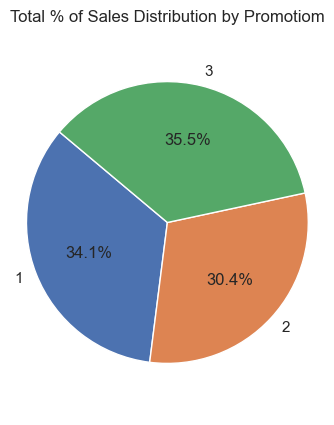

In [72]:
# Calculate percentage sales
index_df['Percentage'] = (index_df['Total_sales'] / overall_total_sum_sales) * 100

# Create a pie chart using Matplotlib
plt.figure(figsize=(4, 5))


# Extract labels and values for the pie chart
labels = index_df.index
values = index_df['Percentage']

plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Total % of Sales Distribution by Promotiom')
plt.show()

### As we can see from this chart, the promotion  3 has the largest aggregate sales amount (35.5%). However, each promotion group takes roughly one third of the total sales during the promotion weeks and there is a different between each market size that sales were occurring in.

## Let's look at the market sizes in each promotion group.



In [73]:
# Grouping by "MarketSize" and "Promotion" columns
# grouped_market = df.groupby(['MarketSize', 'Promotion'])

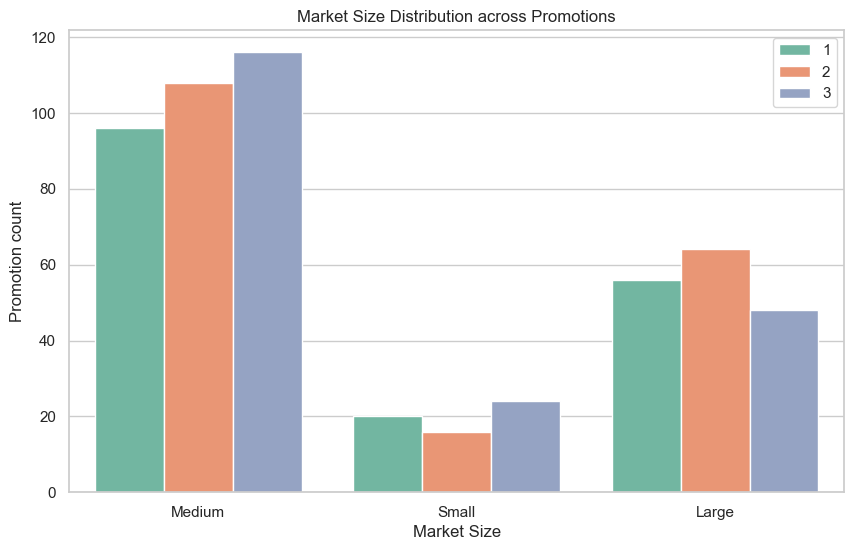

In [74]:
# Create a bar plot using Seaborn's geom_bar
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

ax = sns.countplot(data=df, x='MarketSize', hue='Promotion', palette="Set2")

# Adding legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

plt.title('Market Size Distribution across Promotions')
plt.xlabel('Market Size')
plt.ylabel('Promotion count')

plt.show()

### Here we see that the medium market size occupies the most among all three promotion groups, while the small market size occupies the least.

# Let's run a t-test

In [99]:
# Separate the sales data for each promotion
sales_promo_1 = df[df['Promotion'] == 1]['SalesInThousands']
sales_promo_2 = df[df['Promotion'] == 2]['SalesInThousands']
sales_promo_3 = df[df['Promotion'] == 3]['SalesInThousands']

In [100]:
# Print t-test results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Perform t-test
t_statistic, p_value = stats.ttest_ind(sales_promo_1, sales_promo_2)

# Determine the significance level (usually 0.05)
alpha = 0.05

# Check if p-value is less than alpha
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the two promotions.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the two promotions.")

T-Statistic: 6.453671702181005
P-Value: 3.5506696512134566e-10
Reject the null hypothesis: There is a significant difference between the two promotions.


###  We got the t-value of 6.453 and p-value of 3.550e-10 (which is an extremely small number) that suggest that there is strong evidence against the null hypothesis and that the difference between promotion 1 and promotion 2 is significant and promotion 1 outperform promotion 2

## Results:
We got the t-value of 6.453 and p-value of 3.550e-10 (which is an extremely small number) that suggest that there is strong evidence against the null hypothesis and that the difference between promotion 1 and promotion 2 is significant and promotion 1 outperform promotion 2.

### Reject the null hypothesis - There is a significant difference between promo 1 and promo 2